In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [61]:
# 얼리스탑핑 쉽게
def model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, patience):
    save_file_name = model_name
    cb_checkpoint,cb_earlystopping = checkpoint_ez(MODEL_SAVE_FOLDER_PATH, save_file_name, patience)
    return cb_checkpoint,cb_earlystopping

def checkpoint_ez(MODEL_SAVE_FOLDER_PATH,save_file_name, patience) : 
    MODEL_SAVE_FOLDER_PATH = MODEL_SAVE_FOLDER_PATH
    data_name = save_file_name
    model_path = MODEL_SAVE_FOLDER_PATH + data_name + '.hdf5'
    # val_loss 값이 낮아졌을(좋아졌을) 때만 저장
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                    verbose=1, save_best_only=True
                                   )
    cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = patience, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=False)
    return cb_checkpoint, cb_earlystopping

# 그래프 쉽게
def loss_graph(label1,label2,loss_bottom,loss_top,acc_bottom,acc_top):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label=label1)
    loss_ax.plot(history.history['val_loss'], 'r', label=label2)
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    acc_ax.set_ylim(acc_bottom,acc_top)
    loss_ax.set_ylim(loss_bottom,loss_top)
    return plt.show()

# 모델 저장 def
def json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name):
    # model save by json
    # load model 
    model = keras.models.load_model(MODEL_SAVE_FOLDER_PATH +file_name+ '.hdf5')
    # Save model with json format
    model_json = model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+file_name+'.json', "w") as json_file:
        json_file.write(model_json)
    # Save weight with h5 format
    model.save_weights( MODEL_SAVE_FOLDER_PATH +file_name +'.h5')
    return print("Saved model to disk : "+ file_name +'.h5')


In [62]:
path = '../9.data/1.accData_split/1.diff_heatmap/accident2/'
path_no = '../9.data/1.accData_split/1.diff_heatmap/nonaccident2/'

In [63]:
accList = os.listdir(path)
nonList = os.listdir(path_no)

In [64]:
returnNum = 0
for i in accList:
    if returnNum == 0:
        accImg = cv2.imread(path+i)
        accImg = cv2.resize(accImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        accImg = np.ravel(accImg)
        accImg = np.expand_dims(accImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        accImg = np.concatenate((accImg, temp), axis=0)
        
returnNum = 0
for i in nonList:
    if returnNum == 0:
        nonImg = cv2.imread(path_no+i)
        nonImg = cv2.resize(nonImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        nonImg = np.ravel(nonImg)
        nonImg = np.expand_dims(nonImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path_no+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        nonImg = np.concatenate((nonImg, temp), axis=0)

In [65]:
accY = np.ones(1200)
nonY = np.zeros(1200)

In [66]:
dataX = np.concatenate([accImg, nonImg])
dataY = np.concatenate([accY, nonY])

In [67]:
dataX = dataX/255

np.random.seed(0)
randomList = list(np.random.randint(2400, size = 2400))
dataX = dataX[randomList]
dataY = dataY[randomList]

In [68]:
nTrain = 1800
nTest = 600

x_train = dataX[:nTrain]
x_test = dataX[nTrain:]
y_train = dataY[:nTrain]
y_test = dataY[nTrain:]

In [69]:
# 데이터 reshape 및 차원 추가
x_train = x_train.reshape(x_train.shape[0],167,240,3)
x_test = x_test.reshape(x_test.shape[0],167,240,3)

In [70]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [71]:
y_train.shape

(1800, 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 165, 238, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 119, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 82, 119, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 117, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 58, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 58, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 74240)             0

141/144 [============================>.] - ETA: 0s - loss: 8.4919e-06 - accuracy: 1.0000
Epoch 00022: val_loss did not improve from 0.00602
144/144 [==============================] - 2s 12ms/step - loss: 8.4425e-06 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9944
Epoch 23/1000
141/144 [============================>.] - ETA: 0s - loss: 5.9025e-06 - accuracy: 1.0000
Epoch 00023: val_loss improved from 0.00602 to 0.00439, saving model to ../1.model\model1.hdf5
144/144 [==============================] - 2s 13ms/step - loss: 5.7834e-06 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9972
Epoch 24/1000
141/144 [============================>.] - ETA: 0s - loss: 4.9796e-06 - accuracy: 1.0000
Epoch 00024: val_loss did not improve from 0.00439
144/144 [==============================] - 2s 12ms/step - loss: 4.8785e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9944
Epoch 25/1000
141/144 [============================>.] - ETA: 0s - loss: 5.0800e-06 - accuracy: 1.00

141/144 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9993
Epoch 00050: val_loss did not improve from 0.00321
144/144 [==============================] - 2s 12ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 51/1000
141/144 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993
Epoch 00051: val_loss improved from 0.00321 to 0.00304, saving model to ../1.model\model1.hdf5
144/144 [==============================] - 2s 13ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 52/1000
141/144 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9993
Epoch 00052: val_loss did not improve from 0.00304
144/144 [==============================] - 2s 12ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 53/1000
141/144 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9993
Epoch 00053: val_loss did

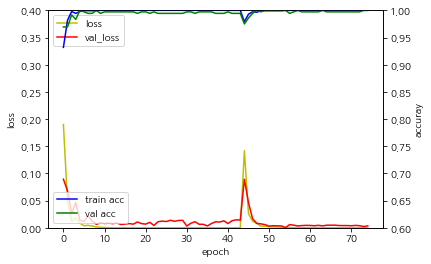

Saved model to disk : model1.h5


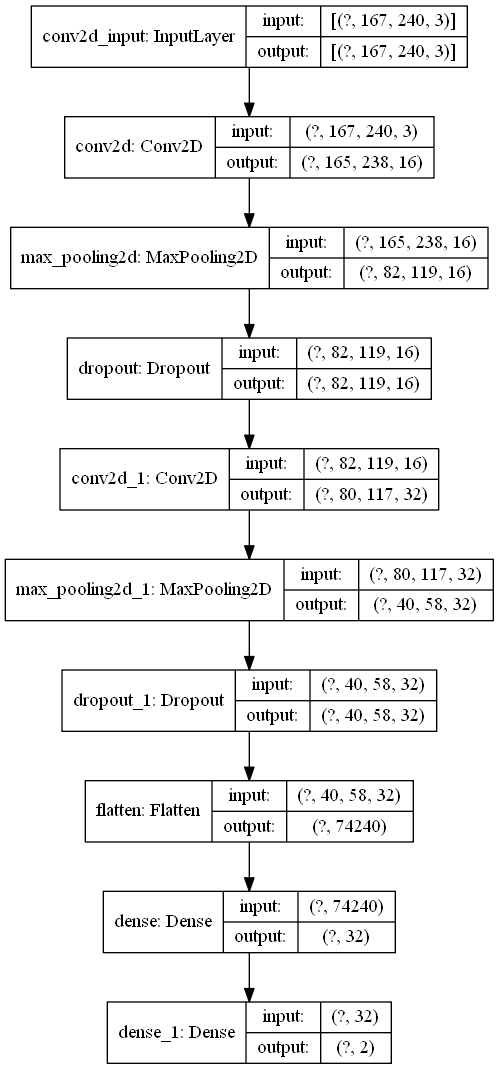

In [74]:
model_name = 'model1'
MODEL_SAVE_FOLDER_PATH = '../1.model/'
cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, 20)

tf.keras.backend.clear_session()


model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size = 3 , input_shape=(167,240,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))
          
model.add(layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))
          
model.add(layers.Flatten())
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=2, activation='sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, shuffle=True,epochs=1000, batch_size=10, validation_split=0.2, callbacks=[cb_checkpoint,cb_earlystopping])
loss_graph('loss','val_loss',0,0.4,0.6,1)

# 모델 저장
file_name = model_name
json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name)

plot_model(
    model, to_file= MODEL_SAVE_FOLDER_PATH +'model.png',
    show_shapes=True,show_layer_names = True,
    expand_nested = True)


In [75]:
loss, acc = model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 11ms/step - loss: 0.0131 - accuracy: 0.9967


In [104]:
o = model.predict(x_test)
o

array([[1.0000000e+00, 1.2658715e-09],
       [9.9993062e-01, 6.4557782e-05],
       [2.2482064e-34, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.3555537e-14],
       [1.0000000e+00, 1.1657449e-19]], dtype=float32)

In [105]:
predicted_Y = np.argmax(np.array(o), axis=1)

In [106]:
target_Y = np.argmax(np.array(y_test), axis=1)
match = predicted_Y == target_Y
wrong_label = np.where(match==False)        
#plt.show(x_test[wrong_label[0]].reshape(167, 240, 3))

In [109]:
wrong_label[0]

array([21, 59], dtype=int64)

In [133]:
target_Y[21]

1

In [131]:
y_test[21]

KeyError: 21

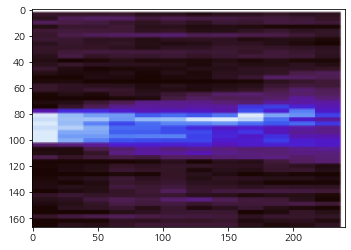

In [128]:
plt.imshow(x_test[21])

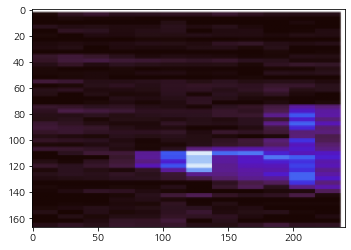

In [115]:
plt.imshow(x_test[59])

In [198]:
y_test

,0.0,1.0
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
495,1,0
496,1,0
497,0,1
498,1,0
